<a href="https://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# TensorFlow Klassifikation

## Daten

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Titel: Pima Indians Diabetes Database

2. Quelle:
   (a) Ursprünglicher Besitzer: National Institute of Diabetes and Digestive and
                                Kidney Diseases
    (b) Datenbankspender: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Daten erhalten: 9 May 1990

3. Vorherige Verwendung:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Mit Hilfe des ADAP Lernalgorithmus den beginn von Diabetes zu prognostizieren.
      {\it Tagungsband des Symposiums für Computeranwendungen und medizinische Versorgung} (pp. 261--265).  IEEE
       Computer Society Press.


Die diagnostische, binär bewertete Variable untersuchte, ob der Patient Anzeichen von Diabetes nach den Kriterien der Weltgesundheitsorganisation zeigt (d.h. ob der 2-stündige Plasmaglukosespiegel bei jeder Untersuchung oder während der medizinischen Routineuntersuchung mindestens 200 mg/dl betrug).


       Ergebnisse: Ihr ADAP-Algorithmus macht eine reale Vorhersage zwischen 0 und 1. Diese wurde mit einem Cutoff von 0,448 in eine binäre Entscheidung umgewandelt. Unter Verwendung von 576 Trainingsinstanzen betrug die Sensitivität und Spezifität ihres Algorithmus bei den restlichen 192 Instanzen 76%.

4. Relevante Information:

Bei der Auswahl dieser Instanzen aus einer größeren Datenbank gab es mehrere Einschränkungen. Insbesondere sind alle Patienten hier Frauen, die mindestens 21 Jahre alt sind. ADAP ist eine adaptive Lernroutine, die digitale Analoga von perzeptronähnlichen Geräten erzeugt und ausführt. Es ist ein einzigartiger Algorithmus. Mehr Details sind in der Veröffentlichung zu finden.

5. Anzahl der Instanzen: 768

6. Anzahl der Attribute:   8 Plus Klasse          

* Anzahl der Schwangerschaften
* Plasmaglukosekonzentration nach 2 Stunden im oralen Glukosetoleranztest
* Diastolischer Blutdruck (mm Hg)
* Trizeps Hautfaltendicke (mm)
* 2-Stunden-Serum-Insulin (mu U/ml)
* Body-Mass-Index (Gewicht in kg/(Größe in m)^2)
* Diabetes-Stammbaumfunktion


    7. Für jedes Attribut: (Numerische Werte)
       1. Anzahl der Schwangerschaften
       2. Plasmaglukosekonzentration nach 2 Stunden im oralen Glukosetoleranztest       
       3. Diastolischer Blutdruck (mm Hg)
       4. Trizeps Hautfaltendicke (mm)
       5. 2-Stunden-Serum-Insulin (mu U/ml)
       6. Body-Mass-Index (Gewicht in kg/(Größe in m)^2)
       7. Diabetes-Stammbaumfunktion       
       8. Alter (Jahre)
       9. Klassenvariable (0 oder 1)

8. Fehlende Attributwerte: Ja

9. Klassen Distribution: (Klassenvariable 1 wird als "Positiv auf Diabetis getestet" interpretiert)


   Klassenvariable   Anzahl der Fälle
           0            500
           1            268

10. Kurze statistische Auswertung:

        Attributwert:    Mittelwert:   Standardabweichung:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.info() # => grup = object = Kategorisch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number_pregnant        768 non-null    int64  
 1   Glucose_concentration  768 non-null    float64
 2   Blood_pressure         768 non-null    float64
 3   Triceps                768 non-null    float64
 4   Insulin                768 non-null    float64
 5   BMI                    768 non-null    float64
 6   Pedigree               768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
 9   Group                  768 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Daten Bereinigen
hierbei wollen wir die Daten Normalisieren

In [6]:
# Auswahl der Spalten für die Normaisierung, das geht nur mit numerischen Werten
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
# hier wird die normalisierung durchgeführt mit einer 
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Spalten

In [9]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

C:\Users\1810837475\.conda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\1810837475\.conda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\1810837475\.conda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\1810837475\.conda\envs\tensorfl

Instructions for updating:
non-resource variables are not supported in the long term


C:\Users\1810837475\.conda\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\1810837475\.conda\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\1810837475\.conda\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\1810837475

### Kontinuierliche Features

* Anzahl der Schwangerschaften
* Plasmaglukosekonzentration nach 2 Stunden im oralen Glukosetoleranztest  
* Diastolischer Blutdruck (mm Hg)
* Trizeps Hautfaltendicke (mm)
* 2-Stunden-Serum-Insulin (mu U/ml)
* Body-Mass-Index (Gewicht in kg/(Größe in m)^2)
* Diabetes Stammbaumfunktion

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Kategorische Features

Wenn du die Menge aller möglichen Features einer Spalte kennst und es nur wenige davon gibt, kannst du `categorical_column_with_vocabulary_list` verwenden. Wenn du die Menge der möglichen Features nicht kennst, kannst du `categorical_column_with_hash_bucket` verwenden.

In [12]:
#diabetes['Group'].unique()
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative mit Hashbucket ...die  besagt das das vom DS geschätzet maximal zahl ist
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Kontinuierliche zu kategorischen Variablen umwandeln 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

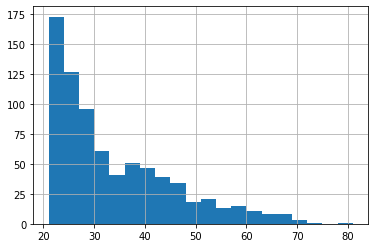

In [14]:
diabetes['Age'].hist(bins=20)

In [15]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Nun fügen wir sie zusammen

In [16]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [17]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number_pregnant        768 non-null    float64
 1   Glucose_concentration  768 non-null    float64
 2   Blood_pressure         768 non-null    float64
 3   Triceps                768 non-null    float64
 4   Insulin                768 non-null    float64
 5   BMI                    768 non-null    float64
 6   Pedigree               768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
 9   Group                  768 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [19]:
x_data = diabetes.drop('Class',axis=1)

In [20]:
labels = diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Funktion

In [23]:
# Daten für Training / check dann in dem Schritt in welchem man das Modell trainiert, nicht im Modell erstellen
# Im training soll der Shuffle auf true sein
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True)

### Das Modell erstellen // Logistic Regression
es geht um eine binäre Klassifikation mit dem Kerngedanken ob jemand Daibetis hat oder eben nicht => o oder 1

In [24]:
# Graphen ersetllen
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\181083~1\\AppData\\Local\\Temp\\tmpz_vh5zkx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EAEB350C48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
# hier wird das Modell tatsählich trainiert
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\181083~1\AppData\Local\Temp\tmpz_vh5zkx\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 200.889
INFO:tensorflow:loss = 6.3394

In [26]:
# Hilfreicher Link:
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names

## Evaluation

In [27]:
# Input function für die Evaluierung => daher auch die TestDaten
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [28]:
# Erstellen der vorhersagen => 
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-27T11:47:17Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\181083~1\AppData\Local\Temp\tmpz_vh5zkx\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-27-11:47:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.65748036, auc = 0.7865992, auc_precision_recall = 0.6196415, average_loss = 0.5298574, global_step = 1000, label/mean = 0.34251967, loss = 5.1762996, precision = 0.6197183, prediction/mean = 0.35409072, recall = 0.50574714
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\181083~1\AppData\L

In [29]:
results # 

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7865992,
 'auc_precision_recall': 0.6196415,
 'average_loss': 0.5298574,
 'label/mean': 0.34251967,
 'loss': 5.1762996,
 'precision': 0.6197183,
 'prediction/mean': 0.35409072,
 'recall': 0.50574714,
 'global_step': 1000}

<a name="Anker"></a>
**Interpretation Results Model Evaluation**<br>
wir haben eine Accuracy von 72%, das ist so lala bei den Testdaten

## Vorhersagen

In [30]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [31]:
# Predictions ist ein Generator 
predictions = model.predict(pred_input_func)

In [32]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\181083~1\AppData\Local\Temp\tmpz_vh5zkx\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.07014084], dtype=float32),
  'logistic': array([0.517528], dtype=float32),
  'probabilities': array([0.48247197, 0.517528  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.44771707], dtype=float32),
  'logistic': array([0.6100963], dtype=float32),
  'probabilities': array([0.38990366, 0.6100963 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.58935714], dtype=float32),
  'logistic': array([0.35678238], dtype=float32),
  'probabilities': array([0.6432177, 0.3567824], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {

**Interpretation**<br>
hier haben wir auf iwelche Daten etwas vorhergesagt: BSP output
```
{'logits': array([0.03003871], dtype=float32),
'logistic': array([0.5075091], dtype=float32),
'probabilities': array([0.4924909, 0.5075091], dtype=float32),
'class_ids': array([1], dtype=int64),
'classes': array([b'1'], dtype=object),
'all_class_ids': array([0, 1]),
'all_classes': array([b'0', b'1'], dtype=object)},
```
Die Zeile "probabilities': array([0.4924909, 0.5075091]" gibt an das die Person zu 0.4924909 der Klasse 0 = kein Diabetis und zu 0.5075091 zu Klasse 1 = Diabetes hat
    
    

# DNN Klassifikator
hier verwenden wir als direkten Vergelich zu dem bisherigen "tf.estimator.LinearClassifier" nun den "tf.estimator.DNNClassifier"

In [33]:
dnn_model = tf.estimator.DNNClassifier()

TypeError: __init__() missing 2 required positional arguments: 'hidden_units' and 'feature_columns'

In [ ]:
# Vergleich logistic regression
# model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
# hier wird ein NN aufgebaut mit 3 hidden layer zu je 10 Neuronen und 2 output-Klassen
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

**Lösung**<br>
die Embeded group collum muss modifziert werden

In [ ]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [ ]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [ ]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

In [ ]:
dnn_model.train(input_fn=input_func,steps=1000)

In [ ]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [ ]:
dnn_model.evaluate(eval_input_func)

[Vergleiche die Accuracy der logistic Regression](#Anker), mit dem DNN erreichen wir 74 % => etwas besser


# Gut gemacht! 